# About Notebook
###### I have created this notebook as a solution to Kaggle competition on House Price Prediction - https://www.kaggle.com/c/house-prices-advanced-regression-techniques
###### I have explored and included many basic pre-processing techniques - feature additiona, outliers, missing values, skewness, standard scaling, multicollinearity, dummy categorical variables and feature selection
###### The regression method is simple linear regression on multiple variables,  and I was able to acheve the RMSLE score in the range of  ~ 1.2 - 1.4 on Kaggle

# Import libraries and data

In [1]:
import pandas as pd;
import numpy as np;
import sklearn as sk;
from sklearn import metrics;
import matplotlib.pyplot as plt;

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
raw_data = pd.read_csv('train.csv');
test_data = pd.read_csv('test.csv');
print(raw_data.shape, test_data.shape)
raw_data.head(10)

(1460, 81) (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
# Pre Processing

In [4]:
raw_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Add Features

In [78]:
raw_data['age_at_sale'] = raw_data['YrSold'] - raw_data['YearBuilt'];
raw_data['age_at_sale'] = raw_data['age_at_sale'].apply(lambda x: 0 if x < 0 else x);

raw_data['year_since_remodel'] = raw_data['YrSold'] - raw_data['YearRemodAdd'];
raw_data['year_since_remodel'] = raw_data['year_since_remodel'].apply(lambda x: 0 if x < 0 else x);

raw_data['age_of_garage'] = raw_data['YrSold'] - raw_data['GarageYrBlt'];
raw_data['age_of_garage'] = raw_data['age_of_garage'].apply(lambda x: 0 if x < 0 else x);




test_data['age_at_sale'] = test_data['YrSold'] - test_data['YearBuilt'];
test_data['age_at_sale'] = test_data['age_at_sale'].apply(lambda x: 0 if x < 0 else x);

test_data['year_since_remodel'] = test_data['YrSold'] - test_data['YearRemodAdd'];
test_data['year_since_remodel'] = test_data['year_since_remodel'].apply(lambda x: 0 if x < 0 else x);

test_data['age_of_garage'] = test_data['YrSold'] - test_data['GarageYrBlt'];
test_data['age_of_garage'] = test_data['age_of_garage'].apply(lambda x: 0 if x < 0 else x);

raw_data.shape

(1460, 84)

### Manually Seperate Categorical and Numerical Features

In [6]:
all_columns = raw_data.columns;

category_list = ['MSSubClass', 'MSZoning', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
        'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'SaleType',
       'SaleCondition'];

# numerical_list = [item for item in all_columns if item not in category_list];
numerical_list = ['age_at_sale','year_since_remodel','age_of_garage','LotFrontage', 'LotArea', 'MasVnrArea',
                  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                  'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
                  'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                  '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

### Check for Outliers and remove them

In [7]:
raw_data[numerical_list].describe()

,age_at_sale,year_since_remodel,age_of_garage,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.000000,1460.000000,1379.000000,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,36.547945,22.950685,29.306019,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041
std,30.250152,20.639875,24.726881,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024
min,0.000000,0.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,4.000000,6.000000,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.000000,14.000000,28.000000,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,54.000000,41.000000,47.000000,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136.000000,60.000000,107.000000,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000


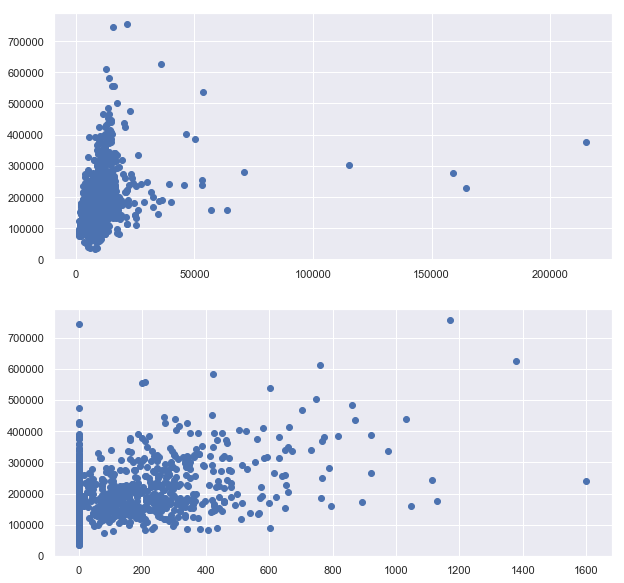

In [8]:
import seaborn as sns; sns.set(); # optional for better visualization
fig, ax = plt.subplots(2, figsize=(10,10));
ax[0].scatter(raw_data['LotArea'], raw_data['SalePrice']);
ax[1].scatter(raw_data['MasVnrArea'], raw_data['SalePrice']);

In [79]:
## checking num of records being removed
q = raw_data['LotArea'].quantile(0.98);
print (raw_data[raw_data['LotArea'] > q]['LotArea'].count())
## removing 2% outlier
raw_data_wo_outlier = raw_data[raw_data['LotArea'] <= q];

## checking num of records being removed
q = raw_data['MasVnrArea'].quantile(0.99);
print (raw_data[raw_data['MasVnrArea'] > q]['MasVnrArea'].count())
## removing 1 % outlier
raw_data_wo_outlier = raw_data_wo_outlier[raw_data_wo_outlier['MasVnrArea'] <= q];

# reset index for new data
raw_data_wo_outlier.reset_index(inplace=True, drop=True);

raw_data_wo_outlier.shape

30
15


(1410, 84)

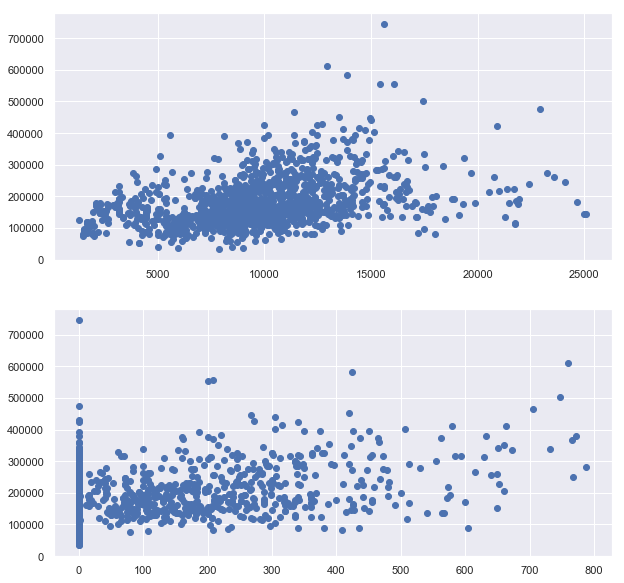

In [10]:
import seaborn as sns; sns.set(); # optional for better visualization
fig, ax = plt.subplots(2, figsize=(10,10));
ax[0].scatter(raw_data_wo_outlier['LotArea'], raw_data_wo_outlier['SalePrice']);
ax[1].scatter(raw_data_wo_outlier['MasVnrArea'], raw_data_wo_outlier['SalePrice']);

### FIll in missing values

In [80]:
raw_data_wo_outlier[numerical_list].isnull().sum()[raw_data_wo_outlier.isnull().sum() > 0].sort_values()

age_of_garage     81
LotFrontage      245
dtype: int64

In [81]:
test_data[numerical_list].isnull().sum()[test_data.isnull().sum() > 0].sort_values()

BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
GarageCars         1
GarageArea         1
BsmtFullBath       2
BsmtHalfBath       2
MasVnrArea        15
age_of_garage     78
LotFrontage      227
dtype: int64

In [108]:
## fill missing numerical variables with mean
raw_data_wo_outlier[numerical_list] = raw_data_wo_outlier[numerical_list].replace(np.nan, raw_data_wo_outlier[numerical_list].mean());


test_data[numerical_list] = test_data[numerical_list].replace(np.nan, raw_data_wo_outlier[numerical_list].mean());

print(raw_data_wo_outlier.shape, test_data.shape)

(1410, 84) (1459, 83)


In [109]:
raw_data_wo_outlier[category_list].isnull().sum()[raw_data_wo_outlier.isnull().sum() > 0].sort_values()

Series([], dtype: int64)

In [110]:
## replce missing values with mode for variables with less missing values (<90)
variable_to_update = raw_data_wo_outlier[category_list].isnull().sum()[raw_data_wo_outlier[category_list].isnull().sum() < 90].index;

raw_data_wo_outlier[variable_to_update] = raw_data_wo_outlier[variable_to_update].replace(np.nan, raw_data_wo_outlier[variable_to_update].mode());


test_data[variable_to_update] = test_data[variable_to_update].replace(np.nan, raw_data_wo_outlier[variable_to_update].mode());

raw_data_wo_null = raw_data_wo_outlier
print(raw_data_wo_null.shape, test_data.shape)

(1410, 84) (1459, 83)


In [111]:
raw_data_wo_null.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,age_at_sale,year_since_remodel,age_of_garage
0,1,60,RL,-0.215054,-0.297430,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.684026,Gd,TA,PConc,Gd,TA,No,GLQ,0.658633,Unf,-0.287206,-0.950558,-0.452996,GasA,Ex,Y,SBrkr,-0.800917,1.201569,-0.119373,0.442026,1.143408,-0.237344,0.824068,1.236844,0.172889,-0.213544,Gd,0.945423,Typ,-0.942218,nan,Attchd,2003.0,RFn,0.338571,0.388001,TA,TA,Y,-0.753740,0.231624,-0.366529,-0.118412,-0.267928,-0.05917,nan,nan,nan,-0.087632,2,2008,WD,Normal,208500,-1.049614,-0.877009,-1.018230
1,2,20,RL,0.548625,0.017179,Pave,nan,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,-0.613960,TA,TA,CBlock,Gd,TA,Gd,ALQ,1.299894,Unf,-0.287206,-0.646208,0.542344,GasA,Ex,Y,SBrkr,0.316364,-0.795300,-0.119373,-0.470285,-0.808415,3.998800,0.824068,-0.753967,0.172889,-0.213544,TA,-0.302748,Typ,0.646930,TA,Attchd,1976.0,RFn,0.338571,-0.031124,TA,TA,Y,1.721768,-0.705265,-0.366529,-0.118412,-0.267928,-0.05917,nan,nan,nan,-0.087632,5,2007,WD,Normal,181500,-0.192987,0.379092,0.063720
2,3,60,RL,-0.062318,0.468575,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.458865,Gd,TA,PConc,Gd,TA,Mn,GLQ,0.139966,Unf,-0.287206,-0.305517,-0.296095,GasA,Ex,Y,SBrkr,-0.624794,1.229628,-0.119373,0.596794,1.143408,-0.237344,0.824068,1.236844,0.172889,-0.213544,Gd,-0.302748,Typ,0.646930,TA,Attchd,2001.0,RFn,0.338571,0.673768,TA,TA,Y,-0.753740,-0.060194,-0.366529,-0.118412,-0.267928,-0.05917,nan,nan,nan,-0.087632,9,2008,WD,Normal,223500,-0.983720,-0.828698,-0.935003
3,4,70,RL,-0.469613,0.003501,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,-0.613960,TA,TA,BrkTil,TA,Gd,No,ALQ,-0.496579,Unf,-0.287206,-0.064762,-0.698153,GasA,Gd,Y,SBrkr,-0.511965,0.972420,-0.119373,0.456281,1.143408,-0.237344,-1.020275,-0.753967,0.172889,-0.213544,Gd,0.321338,Typ,0.646930,Gd,Detchd,1998.0,Unf,1.679542,0.835703,TA,TA,Y,-0.753740,-0.167705,4.153160,-0.118412,-0.267928,-0.05917,nan,nan,nan,-0.087632,2,2006,WD,Abnorml,140000,1.783846,0.620650,-0.893390
4,5,60,RL,0.752273,1.292029,Pave,nan,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.703872,Gd,TA,PConc,Gd,TA,Av,GLQ,0.538397,Unf,-0.287206,-0.178326,0.255510,GasA,Ex,Y,SBrkr,-0.005611,1.666882,-0.119373,1.435794,1.143408,-0.237344,0.824068,1.236844,1.404072,-0.213544,Gd,1.569508,Typ,0.646930,TA,Attchd,2000.0,RFn,1.679542,1.759683,TA,TA,Y,0.841218,0.584878,-0.366529,-0.118412,-0.267928,-0.05917,nan,nan,nan,-0.087632,12,2008,WD,Normal,250000,-0.950772,-0.732075,-0.893390


### Reduce data skewness with Box Cox transformation

In [17]:
from scipy import stats;

#for col in numerical_list:
#    raw_data_wo_null[col] = stats.boxcox(raw_data_wo_null[col]+1)[0];

#for col in numerical_list:
#    test_data[col] = stats.boxcox(test_data[col]+1)[0];

### Standard Scale numerical variables

In [88]:
from sklearn.preprocessing import StandardScaler;
raw_data_std = raw_data_wo_null;

raw_data_wo_null[numerical_list] = pd.DataFrame(StandardScaler().fit(raw_data_wo_null[numerical_list]).transform(raw_data_wo_null[numerical_list]), columns = numerical_list)
test_data[numerical_list] = pd.DataFrame(StandardScaler().fit(raw_data_wo_null[numerical_list]).transform(test_data[numerical_list]), columns = numerical_list)

print(raw_data_std.shape, test_data.shape)
test_data.head()

(1410, 84) (1459, 83)


C:\Users\dhruv\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\dhruv\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\dhruv\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,age_at_sale,year_since_remodel,age_of_garage
0,1461,20,RH,80.0,11622.0,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,-1.511793e-17,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,1.440000e+02,270.0,882.0,GasA,TA,Y,SBrkr,896.0,1.259828e-17,5.039310e-18,896.0,-1.133845e-16,-5.921189e-17,1.0,-2.645638e-17,2.0,1.0,TA,5.0,Typ,-1.259828e-17,nan,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,1.400000e+02,6.299138e-18,2.960595e-17,5.039310e-18,1.200000e+02,1.511793e-17,nan,MnPrv,nan,-3.149569e-18,6,2010,WD,Normal,49.0,49.0,49.0
1,1462,20,RL,81.0,14267.0,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,1.080000e+02,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,3.149569e-18,406.0,1329.0,GasA,TA,Y,SBrkr,1329.0,1.259828e-17,5.039310e-18,1329.0,-1.133845e-16,-5.921189e-17,1.0,1.000000e+00,3.0,1.0,Gd,6.0,Typ,-1.259828e-17,nan,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,3.930000e+02,3.600000e+01,2.960595e-17,5.039310e-18,-5.039310e-17,1.511793e-17,nan,nan,Gar2,1.250000e+04,6,2010,WD,Normal,52.0,52.0,52.0
2,1463,60,RL,74.0,13830.0,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,-1.511793e-17,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,3.149569e-18,137.0,928.0,GasA,Gd,Y,SBrkr,928.0,7.010000e+02,5.039310e-18,1629.0,-1.133845e-16,-5.921189e-17,2.0,1.000000e+00,3.0,1.0,TA,6.0,Typ,1.000000e+00,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,2.120000e+02,3.400000e+01,2.960595e-17,5.039310e-18,-5.039310e-17,1.511793e-17,nan,MnPrv,nan,-3.149569e-18,3,2010,WD,Normal,13.0,12.0,13.0
3,1464,60,RL,78.0,9978.0,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,2.000000e+01,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,3.149569e-18,324.0,926.0,GasA,Ex,Y,SBrkr,926.0,6.780000e+02,5.039310e-18,1604.0,-1.133845e-16,-5.921189e-17,2.0,1.000000e+00,3.0,1.0,Gd,7.0,Typ,1.000000e+00,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,3.600000e+02,3.600000e+01,2.960595e-17,5.039310e-18,-5.039310e-17,1.511793e-17,nan,nan,nan,-3.149569e-18,6,2010,WD,Normal,12.0,12.0,12.0
4,1465,120,RL,43.0,5005.0,Pave,nan,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,-1.511793e-17,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,3.149569e-18,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280.0,1.259828e-17,5.039310e-18,1280.0,-1.133845e-16,-5.921189e-17,2.0,-2.645638e-17,2.0,1.0,Gd,5.0,Typ,-1.259828e-17,nan,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,3.527517e-17,8.200000e+01,2.960595e-17,5.039310e-18,1.440000e+02,1.511793e-17,nan,nan,nan,-3.149569e-18,1,2010,WD,Normal,18.0,18.0,18.0


In [104]:
#temp[['LotFrontage','age_of_garage']] =
pd.DataFrame(StandardScaler().fit(raw_data_wo_null[['LotFrontage','age_of_garage']]).transform(test_data[['LotFrontage','age_of_garage']]), columns = [['LotFrontage','age_of_garage']]).head()
#temp

,LotFrontage,age_of_garage
0,80.0,49.0
1,81.0,52.0
2,74.0,13.0
3,78.0,12.0
4,43.0,18.0


In [105]:
temp = raw_data_wo_null[['LotFrontage','age_of_garage']].head();
temp.head()

,LotFrontage,age_of_garage
0,-0.215054,-1.018230
1,0.548625,0.063720
2,-0.062318,-0.935003
3,-0.469613,-0.893390
4,0.752273,-0.893390


### Get Dummy values for Categorical variables

In [19]:
## convert all category variables as string
raw_data[category_list] = raw_data[category_list].astype(str);

In [20]:
raw_data_category = pd.get_dummies(raw_data_std[category_list].astype(str), drop_first=True);

test_data_category = pd.get_dummies(test_data[category_list].astype(str), drop_first=True);

print(raw_data_category.shape, test_data_category.shape)

(1410, 253) (1459, 239)


In [21]:
## concat with numerical variables
raw_data_std_dummy = pd.concat([raw_data_std[numerical_list + ['SalePrice']], raw_data_category], axis=1);

test_data = pd.concat([test_data[numerical_list], test_data_category], axis=1);

print(raw_data_std_dummy.shape, test_data.shape)
raw_data_std_dummy.head()

(1410, 285) (1459, 270)


,age_at_sale,year_since_remodel,age_of_garage,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,Alley_nan,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_nan,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_nan,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_nan,MiscFeature_Othr

### Get common list of features between Train and Test data for final database

In [22]:
common_features = [x for x in raw_data_std_dummy.columns.tolist() if x in test_data.columns.tolist()];
#test_data_category = pd.concat([test_data_category , pd.DataFrame(columns = missing_test_feature)]);
#test_data_category = test_data_category[raw_data_category.columns];
#test_data_category = test_data_category.replace(np.nan, 0);
#test_data_category.shape

df = raw_data_std_dummy[common_features + ['SalePrice']];
df_test = test_data[common_features];

print(df.shape, df_test.shape)

(1410, 269) (1459, 268)


&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
# Feature selection based on Data Multicollinearity & P-value

### For Numerical Variables

In [23]:
## Create correlation matrix
corr_numerical_matrix = np.absolute(df[numerical_list + ['SalePrice']].corr());

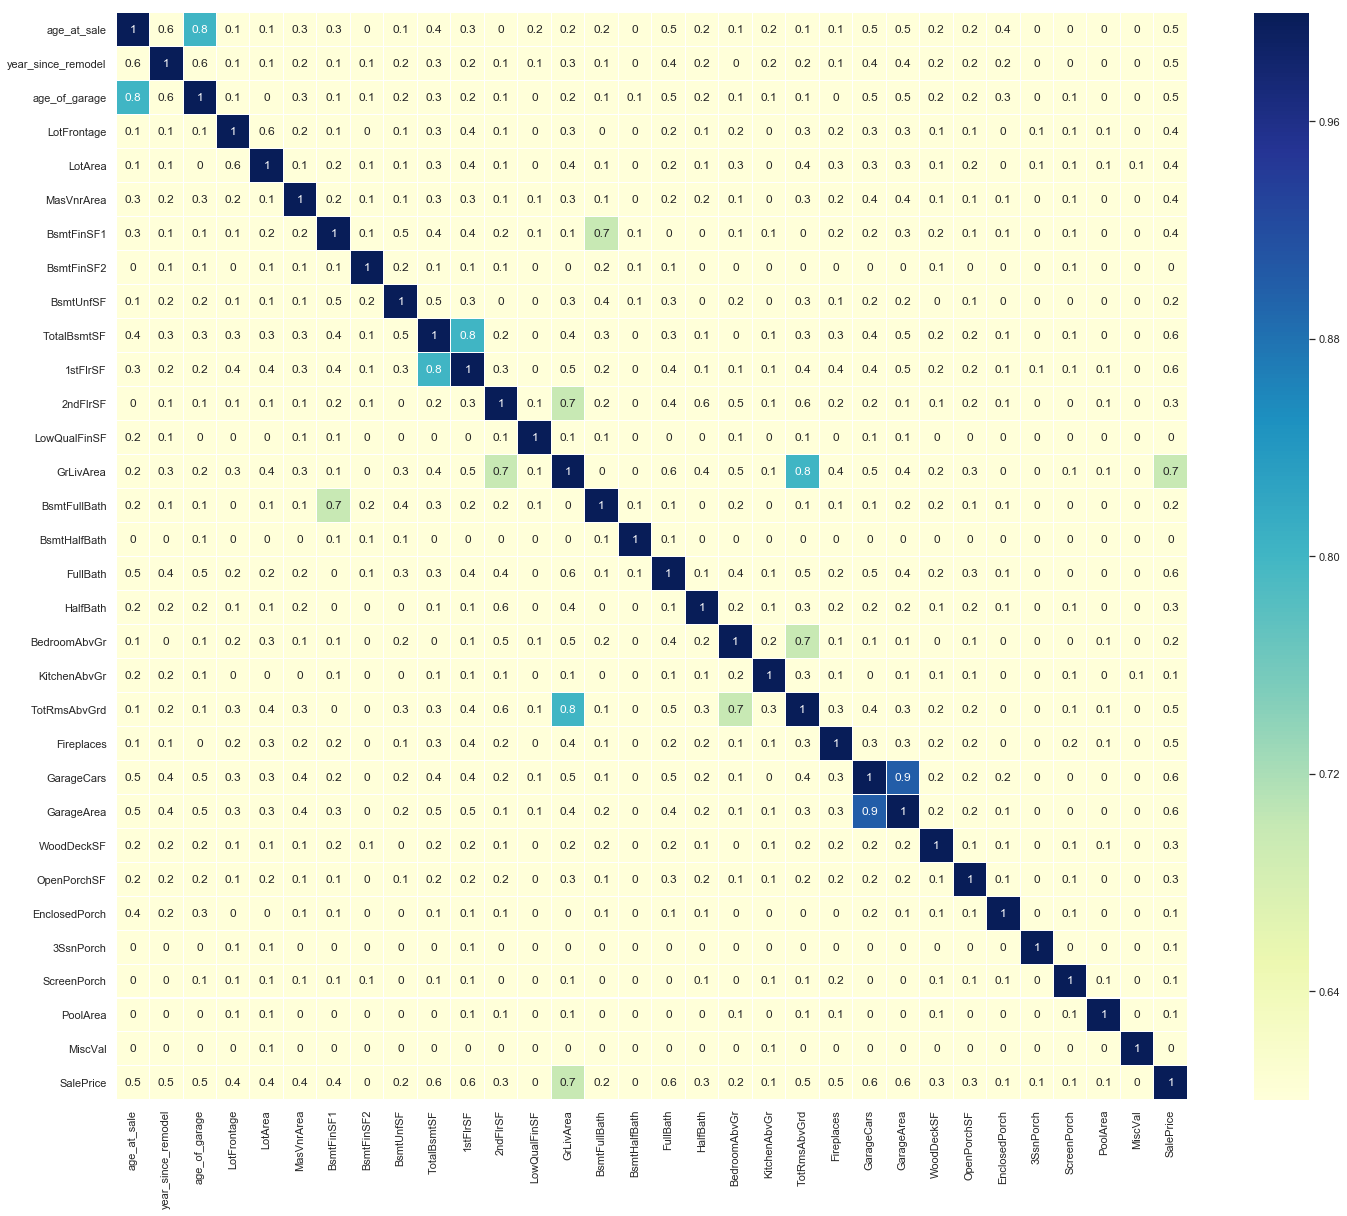

In [24]:
## create coorelation heatmap focusing on > 0.6 values
import seaborn as sns; sns.set();
fig, ax = plt.subplots(figsize=(24,20))
fig = sns.heatmap(np.round(corr_numerical_matrix.astype(float),1), linewidths = 0.005, annot=True, vmin=0.6, cmap="YlGnBu")

In [25]:
# remove due to multicolinearity >= 0.7
remove_numerical_feature_corr = ['age_of_garage', 'year_since_remodel','TotalBsmtSF','TotRmsAbvGrd','GarageArea'];
new_numerical_list = [x for x in numerical_list if x not in remove_numerical_feature_corr];

In [26]:
## check for p-value
from sklearn.feature_selection import f_regression;
f, p = f_regression(df[new_numerical_list], df['SalePrice']);
pd.concat([round(pd.DataFrame(p, columns = ['p_value']),3), pd.DataFrame(df[new_numerical_list].columns, columns=['feature'])], axis=1).sort_values('p_value', ascending=False).head()

,p_value,feature
5,0.547,BsmtFinSF2
25,0.442,MiscVal
9,0.310,LowQualFinSF
12,0.158,BsmtHalfBath
22,0.044,3SsnPorch


In [27]:
# remove due to high p value > 0.05
remove_numerical_feature = remove_numerical_feature_corr + ['BsmtHalfBath','LowQualFinSF'] #,'2ndFlrSF','1stFlrSF']#,'MiscVal','3SsnPorch','BsmtFinSF2'];
new_numerical_list = [x for x in numerical_list if x not in remove_numerical_feature];

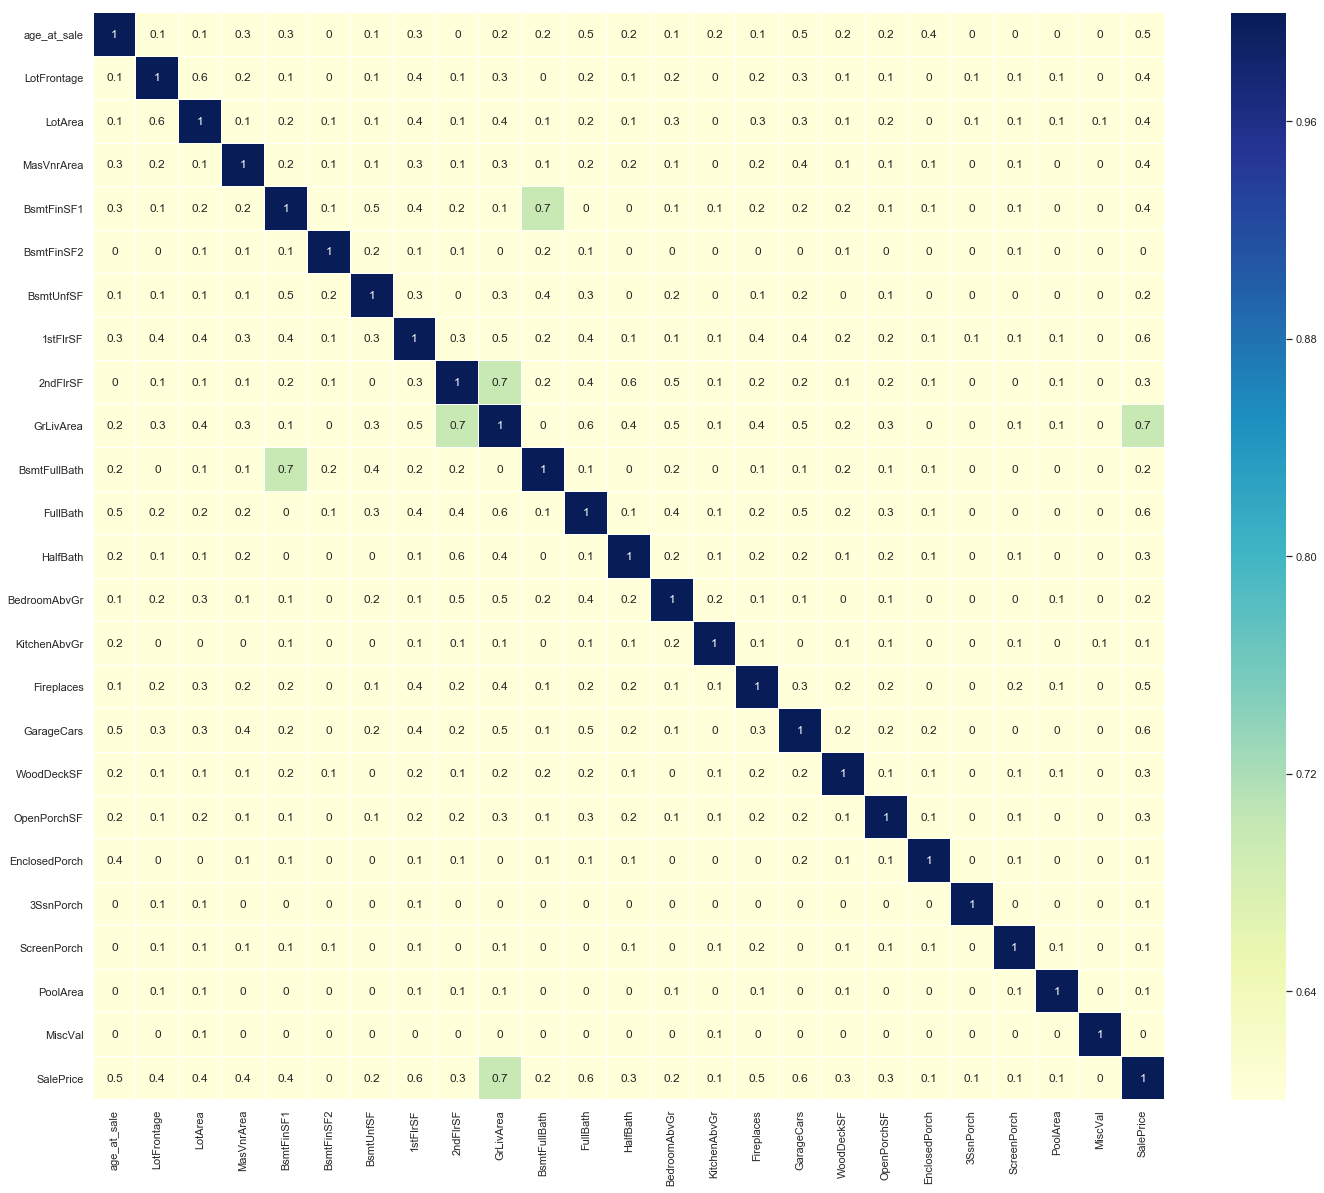

In [28]:
## recheck collinearity
corr_numerical_matrix = np.absolute(df[new_numerical_list + ['SalePrice']].corr());

import seaborn as sns; sns.set();
fig, ax = plt.subplots(figsize=(24,20))
fig = sns.heatmap(np.round(corr_numerical_matrix.astype(float),1), linewidths = 0.005, annot=True, vmin=0.6, cmap="YlGnBu")

In [29]:
## recheck p-value
from sklearn.feature_selection import f_regression;
f, p = f_regression(df[new_numerical_list], df['SalePrice']);
pd.concat([round(pd.DataFrame(p, columns = ['p_value']),3), pd.DataFrame(df[new_numerical_list].columns, columns=['feature'])], axis=1).sort_values('p_value', ascending=False).head()

,p_value,feature
5,0.547,BsmtFinSF2
23,0.442,MiscVal
20,0.044,3SsnPorch
13,0.000,BedroomAbvGr
22,0.000,PoolArea


### For Categorical Variables

In [30]:
dummy_category_list = [x for x in df.columns if x not in numerical_list] + ['SalePrice']
corr_categorical_matrix = df[dummy_category_list].corr();
np.absolute(corr_categorical_matrix).head()

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,Alley_nan,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_nan,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Gd,PoolQC_nan,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_nan,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_nan,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice,SalePrice
MSSubClass_160,1.000000,0.017972,0.029712,0.161553,0.047867,0.011342,0.019701,0.071161,0.105852,0.044830,0.022050,0.043646,0.025507,0.041611,0.303758,0.022782,0.313097,0.198331,0.011342,0.248594,0.133814,0.007196,0.016063,0.

In [31]:
## reduce matrix size by retaining only correlated features >= 0.7

row_sum = pd.DataFrame(corr_categorical_matrix[np.absolute(corr_categorical_matrix) >= 0.7].sum(), columns=['sum']);
cat_features_for_heatmap = ['SalePrice'] + row_sum[row_sum['sum'] > 1].index.tolist();
corr_categorical_matrix_new = np.absolute(df[cat_features_for_heatmap].corr());
corr_categorical_matrix_new.shape

(37, 37)

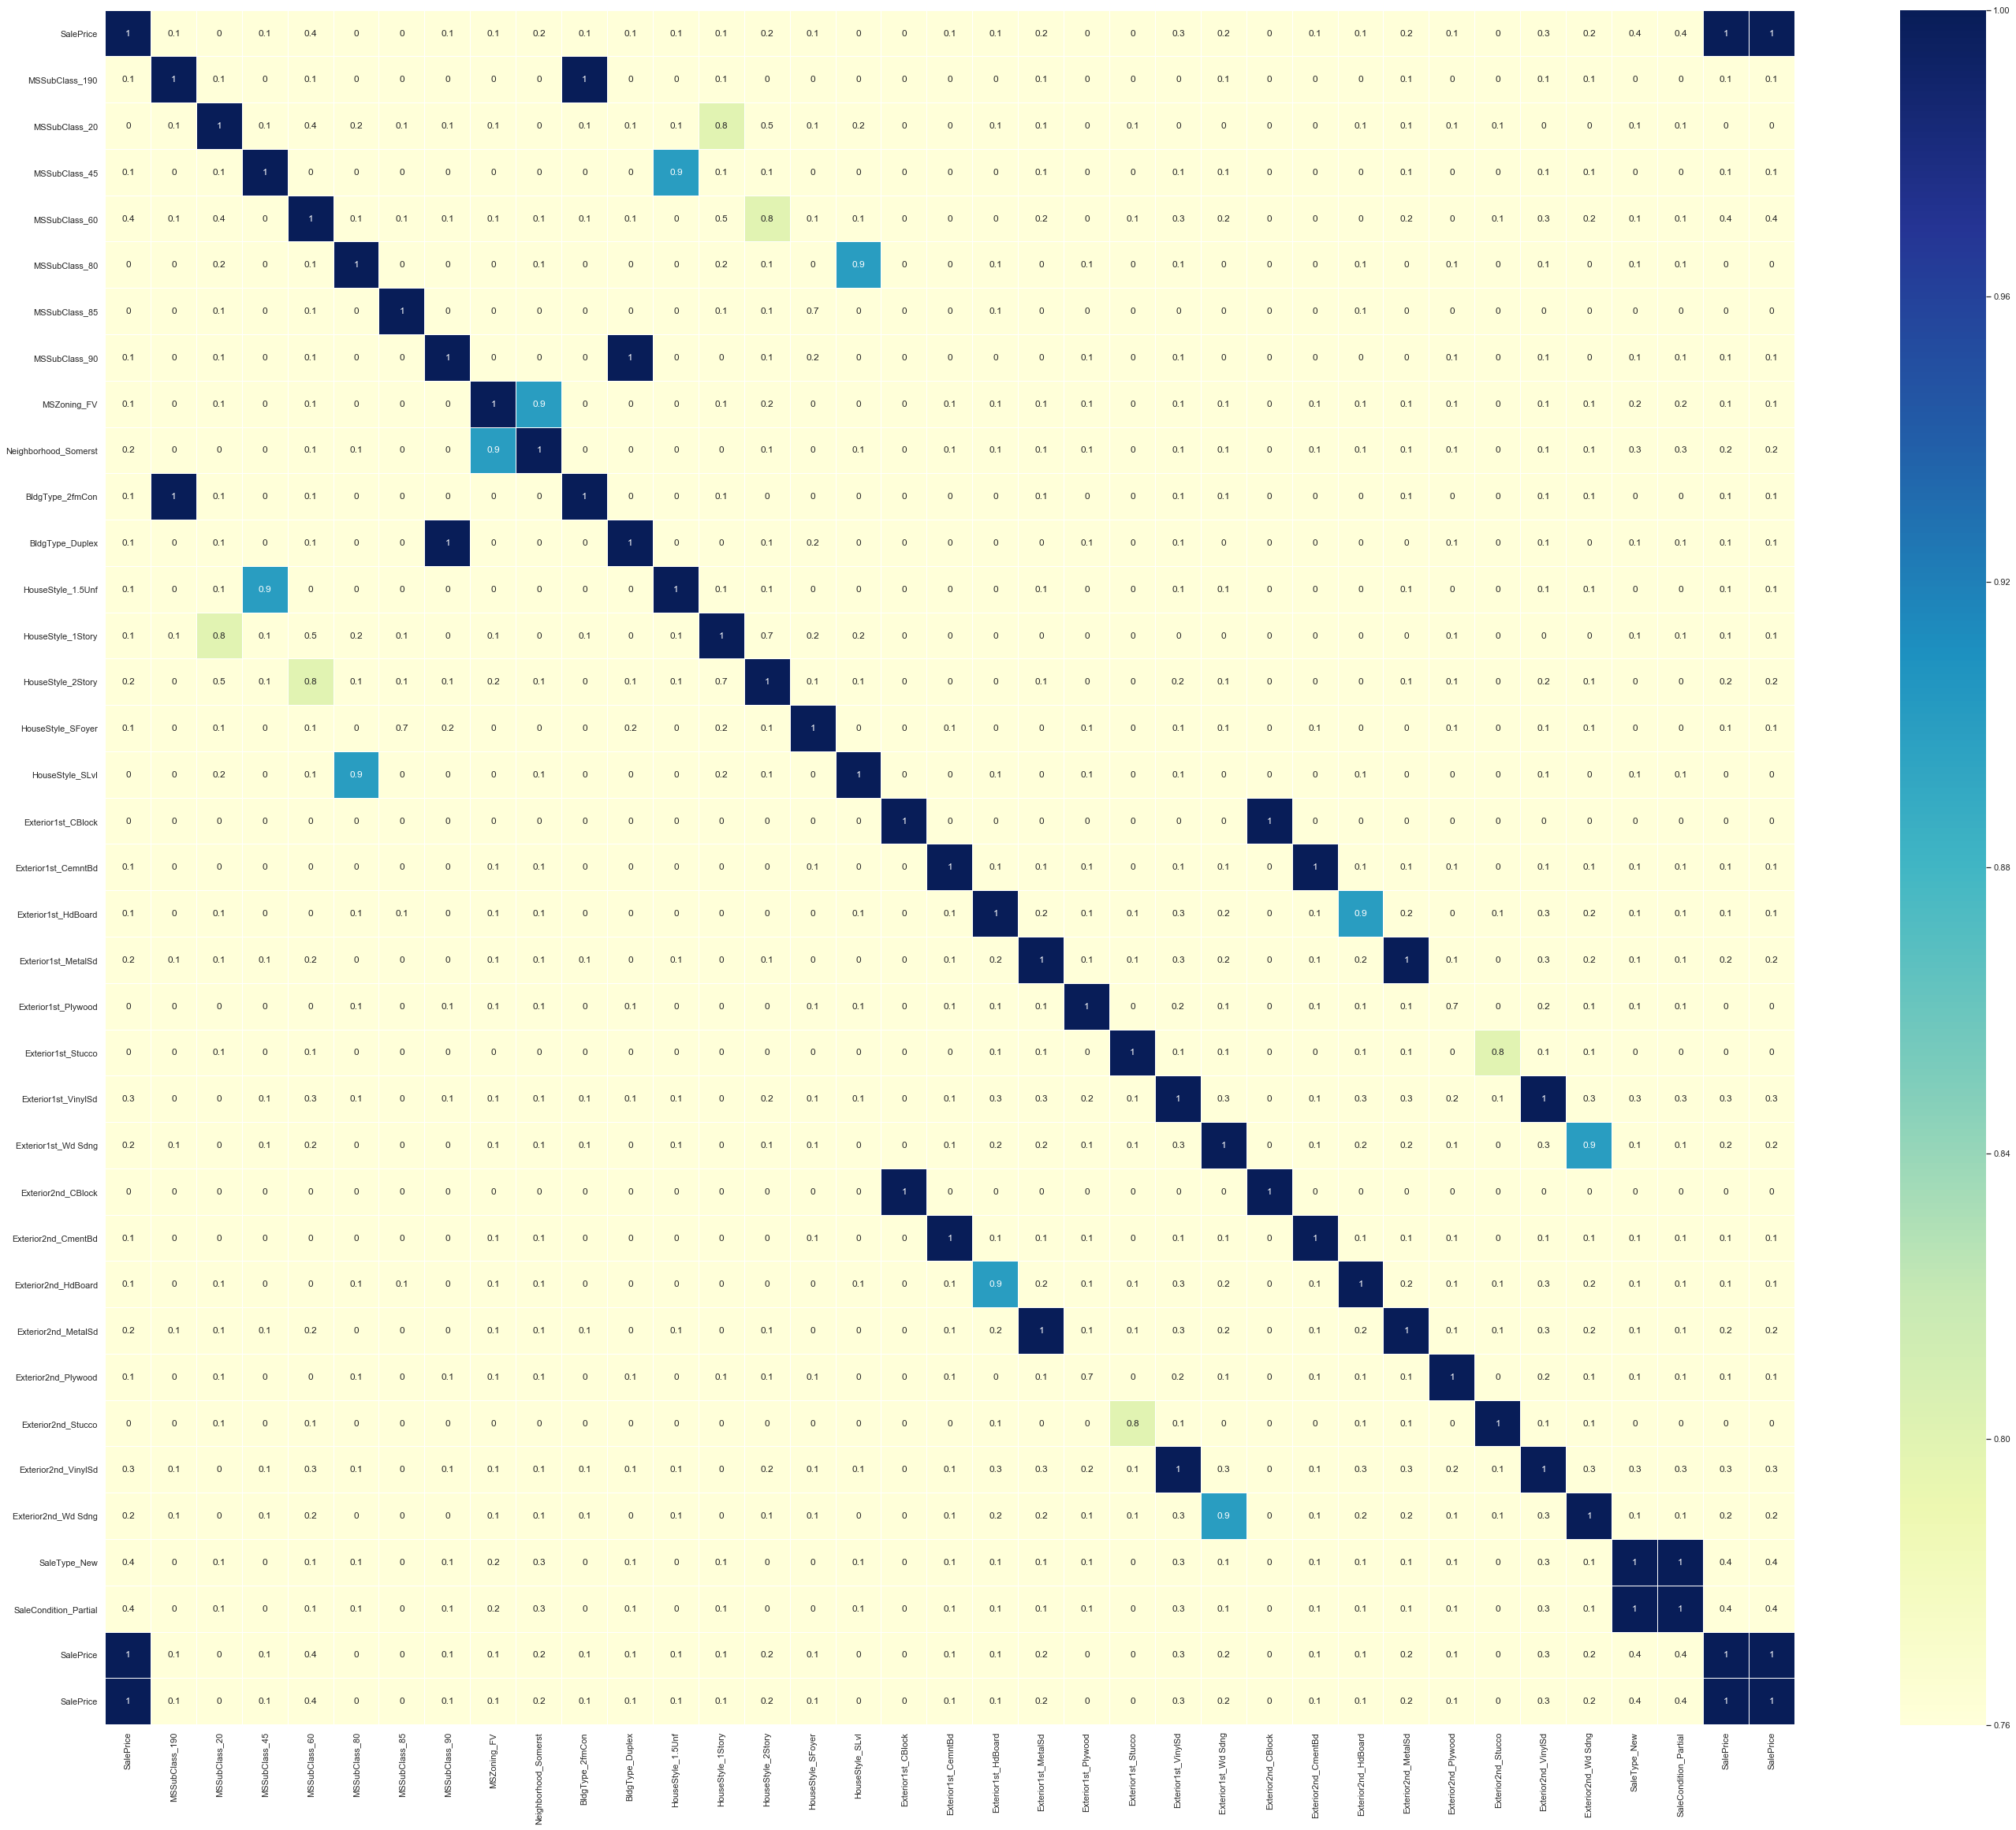

In [32]:
import seaborn as sns; sns.set();
fig, ax = plt.subplots(figsize=(48,40))
fig = sns.heatmap(np.round(corr_categorical_matrix_new.astype(float),1), linewidths = 0.005, annot=True, vmin=0.76, cmap="YlGnBu")

In [33]:
# remove due to collinearity
remove_categorical_feature_corr = ['SalePrice','BldgType_2fmCon','HouseStyle_1Story','HouseStyle_2Story','HouseStyle_1.5Unf','HouseStyle_SFoyer','HouseStyle_SLvl','BldgType_Duplex','MSZoning_FV','Condition2','Exterior2nd_CBlock','Exterior2nd_CmentBd','Exterior2nd_HdBoard','Exterior2nd_MetalSd','Exterior2nd_Plywood','Exterior2nd_Stucco','Exterior2nd_VinylSd','Exterior2nd_Wd Sdng','HouseStyle_1Story','BsmtCond_nan','BsmtExposure_nan','BsmtFinType1_nan','Electrical_Mix','GarageType_nan','GarageFinish_nan','GarageQual_nan','MiscFeature_TenC','SaleCondition_Partial','Condition2_RRAe','BsmtQual_nan','BsmtFinType2_nan','GarageQual_TA']; # remove due to multicolinearity

new_category_list = [x for x in dummy_category_list if x not in remove_categorical_feature_corr];
new_category_list;

In [34]:
## check p-value
from sklearn.feature_selection import f_regression;
f, p = f_regression(df[new_category_list], df['SalePrice']);
p = pd.concat([round(pd.DataFrame(p, columns = ['p_value']),3), pd.DataFrame(df[new_category_list].columns, columns=['feature'])], axis=1).sort_values('p_value', ascending=False);
p.head()

,p_value,feature
24,0.987,LandContour_Low
143,0.953,BsmtFinType2_GLQ
199,0.926,MoSold_2
182,0.923,GarageCond_Gd
27,0.917,LotConfig_FR2


In [35]:
remove_categorical_feature_p_value = p[p['p_value'] > 0.05]['feature'].tolist();
new_category_list = remove_categorical_feature_corr + remove_categorical_feature_p_value
new_category_list = [x for x in dummy_category_list if x not in new_category_list];
new_category_list;

In [36]:
## remove features with very less number of values

num_of_values = pd.DataFrame(df[new_category_list].sum().sort_values(), columns = ['values'])
num_of_values

remove_categorical_feature_less_value = num_of_values[num_of_values['values'] < 10].index.tolist();
new_category_list = remove_categorical_feature_corr + remove_categorical_feature_p_value + remove_categorical_feature_less_value
new_category_list = [x for x in dummy_category_list if x not in new_category_list];
new_category_list
#num_of_values;

['MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSSubClass_30',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_90',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'Alley_nan',
 'LotShape_IR2',
 'LotShape_Reg',
 'LandContour_HLS',
 'LotConfig_CulDSac',
 'LotConfig_Inside',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_NAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition1_Feedr',
 'Condition1_Norm',
 'BldgType_Twnhs',
 'OverallQual_10',
 'OverallQual_3',
 'OverallQual_4',
 'OverallQual_5',
 'OverallQual_6',
 'OverallQual_7',
 'OverallQual_8',
 'OverallQual_9',
 'OverallCond_3',
 'OverallCond_4',
 'OverallCond_5',
 '

In [37]:
## recheck correlation
corr_categorical_matrix = df[new_category_list].corr();
np.absolute(corr_categorical_matrix).head()

row_sum = pd.DataFrame(corr_categorical_matrix[np.absolute(corr_categorical_matrix) >= 0.7].sum(), columns=['sum']);
cat_features_for_heatmap = ['SalePrice'] + row_sum[row_sum['sum'] > 1].index.tolist();
corr_categorical_matrix_new = np.absolute(df[cat_features_for_heatmap].corr());
corr_categorical_matrix_new

,SalePrice
SalePrice,1.0


In [38]:
## recheck p value
## check p-value
from sklearn.feature_selection import f_regression;
f, p = f_regression(df[new_category_list], df['SalePrice']);
p = pd.concat([round(pd.DataFrame(p, columns = ['p_value']),3), pd.DataFrame(df[new_category_list].columns, columns=['feature'])], axis=1).sort_values('p_value', ascending=False);
p.head()

,p_value,feature
34,0.048,Neighborhood_Veenker
88,0.038,BsmtFinType2_Rec
101,0.036,Functional_Mod
70,0.035,ExterCond_Gd
87,0.028,BsmtFinType2_BLQ


### finalize database

In [45]:
final_feature = new_numerical_list + new_category_list;

df_train = df#[final_feature];
df_test = df_test[final_feature];

&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
# Linear Regression

In [46]:
# define RMSLE (kaggle evaluation metric)
def rmsle(y_pred, y_test): 
    assert len(y_test) == len(y_pred)
    return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_test))**2))

### only Numerical Variables

In [47]:
## execute 20 iterations

x = df_train[new_numerical_list];
#x[new_numerical_list] = np.log(x[new_numerical_list]+1)
#x = x.iloc[:,1:];
y = df['SalePrice'];
y=np.log(y);

from sklearn import linear_model;
from sklearn.model_selection import train_test_split;
for iter in range(1,20):
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3)
    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)
    mean_error = np.mean(np.absolute(regr.predict(x_val) - y_val)/y_val);
    print(regr.score(x_val,y_val), regr.score(x_train,y_train), mean_error, rmsle(np.exp(regr.predict(x_val)), np.exp(y_val)), rmsle(np.exp(regr.predict(x_train)), np.exp(y_train)));

0.8239469402921697 0.8457627215303949 0.009943430208293677 0.16874783627080334 0.15153585221369506
0.8155910978168088 0.8492871719337837 0.0096607890076424 0.1659132151088798 0.15236382245665483
0.8333454256903214 0.8424031874058084 0.009507288151060089 0.1599756831358453 0.1549678116346627
0.8475931083496129 0.8360252156176844 0.008924030115313156 0.15406805163104534 0.15750967014859232
0.8475319422875471 0.8359028846889031 0.00932694247512146 0.15437761127071795 0.1574979143732039
0.8120535684608367 0.8494851271844674 0.009486185211681587 0.16407052819218074 0.1535865716264841
0.80215543702403 0.8531978520479612 0.009676670394965217 0.16365888520246008 0.15330874884682286
0.8129124647213177 0.8510966530181208 0.009784899462527382 0.1729306914459826 0.1486970730626484
0.8312938131014546 0.8431436511006746 0.009518946697694337 0.15866143773164865 0.15553288691040015
0.8149087116395247 0.8507227276653324 0.010210568090305627 0.1744127060949583 0.14851174543677076
0.8071440670755584 0.85

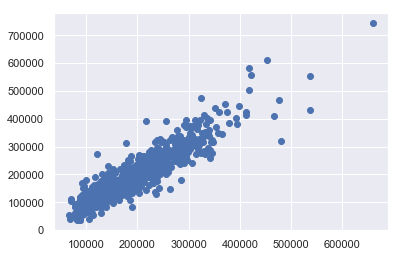

In [48]:
plt.scatter(np.exp(regr.predict(x)),np.exp(y));
#sns.distplot(regr.predict(x) - y)

### only Categorical variables

In [49]:
## execute 20 iterations

x = df[new_category_list];
#x[new_numerical_list] = np.log(x[new_numerical_list]+1)
#x = x.iloc[:,1:];
y = df['SalePrice'];
y=np.log(y);

from sklearn import linear_model;
from sklearn.model_selection import train_test_split;
for iter in range(1,20):
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3)
    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)
    val_per_diff = np.mean(np.absolute(regr.predict(x_val) - y_val)/y_val);
    print(regr.score(x_val,y_val), regr.score(x_train,y_train), val_per_diff, rmsle(np.exp(regr.predict(x_val)), np.exp(y_val)), rmsle(np.exp(regr.predict(x_train)), np.exp(y_train)));

0.8160741020496926 0.8687656680130332 0.009903950920535474 0.15513967288170283 0.14565957833379295
0.8149399378801281 0.8704597772972846 0.010721529868872613 0.1645978338414387 0.1418150641254697
0.8030253160884734 0.8742986714090449 0.010229671436628193 0.16382575452986478 0.14156904639213094
0.8193267571168743 0.8685745923008885 0.010325101752474645 0.1654623640988835 0.1416578635586075
0.7971634501542073 0.8750301657953646 0.011150278694466538 0.17769766529757536 0.13759025346536247
0.8222802376574676 0.8666567240610207 0.010010120635837005 0.15899697696464782 0.1447770511825076
0.8227727363989958 0.8672591243737954 0.010718915499532206 0.16517881380339 0.14206673616923635
0.8257096284204477 0.867412732738152 0.00998750823924167 0.15917838652027175 0.14374659557736608
0.8207015104970209 0.8702370992876172 0.009842819744824855 0.15833442037715229 0.14322213133903638
0.8123052335322691 0.8727358774600832 0.01081293281766534 0.1744071402346333 0.13754033159153098
0.832964355923534 0.86

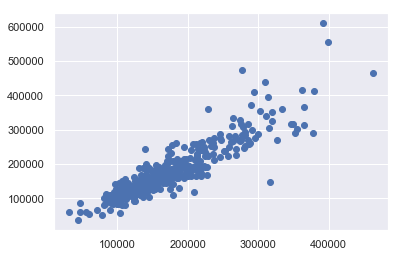

In [50]:
plt.scatter(np.exp(regr.predict(x_val)),np.exp(y_val));
#sns.distplot(np.exp(regr.predict(x_val)) - np.exp(y_val))

### Combining all features

In [59]:
## execute 20 iterations

x = df[final_feature];
#x[new_numerical_list] = np.log(x[new_numerical_list]+1)
#x = x.iloc[:,1:];
y = df['SalePrice'];
y=np.log(y);

from sklearn import linear_model;
from sklearn.model_selection import train_test_split;
for iter in range(1,20):
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3)
    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)
    val_per_diff = np.mean(np.absolute(regr.predict(x_val) - y_val)/y_val);
    print(regr.score(x_val,y_val), regr.score(x_train,y_train), val_per_diff, rmsle(np.exp(regr.predict(x_val)), np.exp(y_val)), rmsle(np.exp(regr.predict(x_train)), np.exp(y_train)));
    if rmsle(np.exp(regr.predict(x_val)), np.exp(y_val)) < 0.103:
        break;

0.9142180251018732 0.9398077322301086 0.006627056553792635 0.11318132325636959 0.09633098752780683
0.9206437022348266 0.9352113282259957 0.006807811709505792 0.11497075833159119 0.09744076839399776
0.9026530262046466 0.9436383045764029 0.007408878440973818 0.12668793380959525 0.09109744074200386
0.917610136286899 0.9385130433364877 0.007071179395111529 0.11888627033731713 0.09431256038133944
0.9258782892556173 0.934363846467164 0.006459445975954253 0.10486701091135436 0.10065227956384498
0.8999653616740131 0.9414957698300742 0.007144925229020226 0.1145169877310036 0.09725235932012662
0.9052967162660548 0.942125208517042 0.007212750213271377 0.12685039875446 0.09166315374990144
0.9221394175796098 0.9354271630973106 0.00630580846543588 0.09933782550139064 0.10274691158507854


In [61]:
test_data = pd.read_csv('test.csv');

#regr.fit(x, y)

x_test = df_test;

Id = pd.DataFrame(test_data['Id']);
SalePrice = pd.DataFrame(np.exp(regr.predict(x_test)), columns=['SalePrice'])
final_prediction = pd.concat([Id, SalePrice], axis=1);
final_prediction.head()

final_prediction.to_csv('final_5.csv', index=False)

In [112]:
final_prediction.head()

,Id,SalePrice
0,1461,118752.093187
1,1462,150711.865683
2,1463,182273.425338
3,1464,198283.584687
4,1465,203624.291203
